# Base-MLP

A baseline Multi-Layered Perceptron with 1 hidden layer of100 neurons, sigmoid/logistic
as activation function, stochastic gradient descent, and default values for the rest of the parameters.

We start by importing the libraries.

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from utils import config, ProcessDataset, model_utils
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

## Loading Latin and Greek train and val data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.
+ Calling helper method to load the dataset of training and validating

In [2]:
Latin_X_Train, Latin_Y_Train, Latin_X_Val, Latin_Y_Val = ProcessDataset.get_Latin_Train_Val()
Greek_X_Train, Greek_Y_Train, Greek_X_Val, Greek_Y_Val = ProcessDataset.get_Greek_Train_Val()

### Training the base mlp model

In [3]:
clf_latin = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')
clf_latin.fit(Latin_X_Train, Latin_Y_Train)

clf_greek = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')
clf_greek.fit(Greek_X_Train, Greek_Y_Train)

MLPClassifier(activation='logistic', solver='sgd')

## Validating the model with K-Fold Cross-Validation

In [4]:
kfold = KFold(n_splits=10, random_state=100)

results_kfold = cross_val_score(clf_latin, Latin_X_Val, Latin_Y_Val, cv=kfold)
print("Accuracy of latin prediction: %.2f%%" % (results_kfold.mean()*100.0)) 

results_kfold = cross_val_score(clf_greek, Greek_X_Val, Greek_Y_Val, cv=kfold)
print("Accuracy of greek prediction: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy of latin prediction: 3.79%
Accuracy of greek prediction: 70.81%


## Test the models

### Load the test datasets

In [5]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

### Make prediction and export results to `csv` files

In [6]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y_Pred).to_csv("./Output/BASE-MLP-DS1.csv", header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y_Pred).to_csv("./Output/BASE-MLP-DS2.csv", header=None)

## Assert the accuracy of the models:

### 1. Confusion Matrix

#### Latin Character Predicition Model:

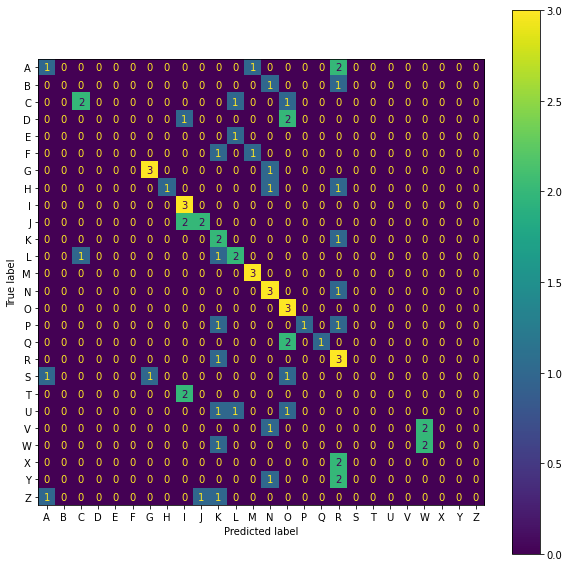

In [7]:
model_utils.show_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test, isGreekLetter=False)

#### Greek Character Prediction Model:

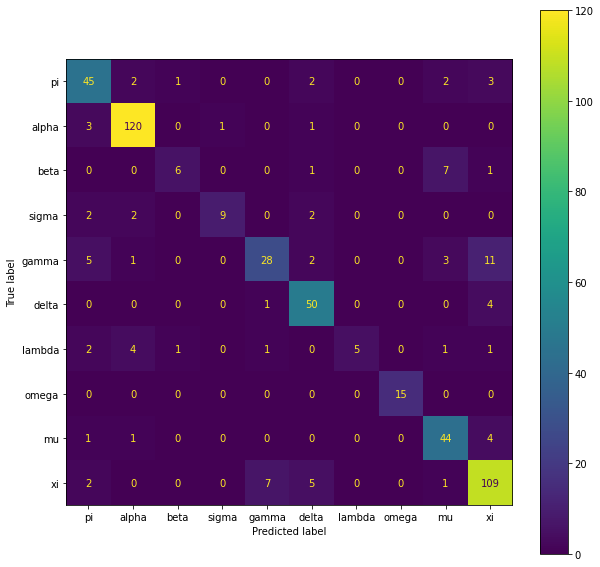

In [8]:
model_utils.show_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test, isGreekLetter=True)

### 2. Precision, recall, and f1-measure for each class

#### Latin Character Prediciton Model:

In [9]:
model_utils.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

,precision,recall,f1
0,0.333333,0.250000,0.285714
1,0.000000,0.000000,0.000000
2,0.666667,0.500000,0.571429
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.750000,0.750000,0.750000
7,1.000000,0.333333,0.500000
8,0.375000,1.000000,0.545455
9,0.666667,0.500000,0.571429


#### Greek Character Prediction Model:

In [10]:
model_utils.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.750000,0.818182,0.782609
1,0.923077,0.960000,0.941176
2,0.750000,0.400000,0.521739
3,0.900000,0.600000,0.720000
4,0.756757,0.560000,0.643678
5,0.793651,0.909091,0.847458
6,1.000000,0.333333,0.500000
7,1.000000,1.000000,1.000000
8,0.758621,0.880000,0.814815
9,0.819549,0.879032,0.848249


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### Base-MLP model on DS1 - Latin characters

In [11]:
print("Accuracy of base-MLP model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of base-MLP model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of base-MLP model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")

Accuracy of base-MLP model on DS1: 40.50632911392405%
Macro-average f1 of base-MLP model on DS1: 29.30040045424661%
Weighted-average f1 of base-MLP model on DS1: 33.30463488691337%


#### Base-MLP model on DS2 - Greek characters

In [12]:
print("Accuracy of base-MLP model on DS1: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
print("Macro-average f1 of base-MLP model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of base-MLP model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of base-MLP model on DS1: 83.04431599229287%
Macro-average f1 of base-MLP model on DS1: 76.19723926765546%
Weighted-average f1 of base-MLP model on DS1: 82.18387701283156%
